<a href="https://colab.research.google.com/github/OmarEscuela/omar/blob/master/Tarea_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip jena_climate_2009_2016.csv.zip

--2024-04-08 06:16:06--  https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.129.104, 16.182.37.80, 52.217.230.168, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.129.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13565642 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  23.7MB/s    in 0.5s    

2024-04-08 06:16:07 (23.7 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13565642/13565642]

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
import keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation, Convolution2D, MaxPooling2D, Flatten , Activation, Lambda, Convolution1D
from tensorflow.keras.optimizers import RMSprop,Adam

In [ ]:
import os
fname = os.path.join("jena_climate_2009_2016.csv")
with open(fname) as f:
    data = f.read()

lines = data.split("\n")
header = lines[0].split(",")
lines = lines[1:]
print(header)
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [ ]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

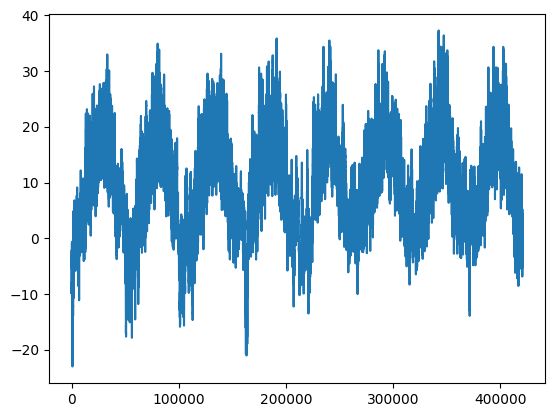

In [ ]:
from matplotlib import pyplot as plt
plt.plot(range(len(temperature)), temperature)

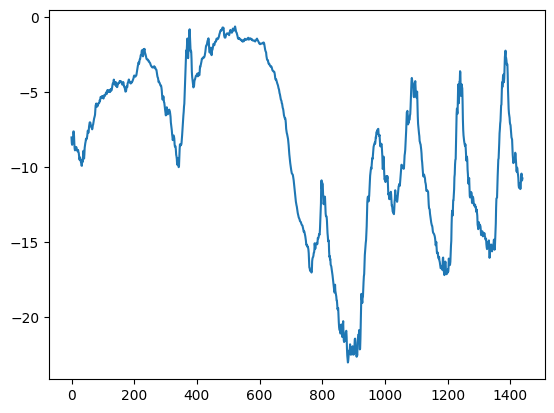

In [ ]:
plt.plot(range(1440), temperature[:1440])

In [ ]:
train_dataset1 = keras.utils.timeseries_dataset_from_array(
    data=temperature[:-60],
    targets=temperature[60:],
    sampling_rate=0.001,
    sequence_length=60,
    shuffle=True,
    batch_size=60,
    start_index=0,
    end_index=0+60)
#for temperature ,targets in train_dataset1:#aquí no se porque no me permitió visualizar, si mis inputs son la
    #temperatura en train_dataset1
    #print("series x")
    #print(temperature)
    #print("y")
    #print(targets)

In [ ]:
val_dataset2 = keras.utils.timeseries_dataset_from_array(
    data=temperature[:-30],
    targets=temperature[30:],
    sampling_rate=0.0001,
    sequence_length=30,
    shuffle=True,
    batch_size=30,
    start_index=60,
    end_index=60+30)

In [ ]:
test_dataset3 = keras.utils.timeseries_dataset_from_array(
    data=temperature[:-30],
    targets=temperature[30:],
    sampling_rate=0.001,
    sequence_length=30,
    shuffle=True,
    batch_size=30,
    start_index=90,
    end_index=90+30)

<ipython-input-26-abb43bb4d077>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(seq_length, seq_length + look_ahead),Y[i,:,0],'bo',color='orange')


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, None, 32)          192       
                                                                 
 conv1d_10 (Conv1D)          (None, None, 32)          5152      
                                                                 
 conv1d_11 (Conv1D)          (None, None, 32)          5152      
                                                                 
 conv1d_12 (Conv1D)          (None, None, 32)          5152      
                                                                 
 dense_2 (Dense)             (None, None, 1)           33        
                                                                 
 lambda_2 (Lambda)           (None, None, 1)           0         
                                                                 
Total params: 15681 (61.25 KB)
Trainable params: 15681

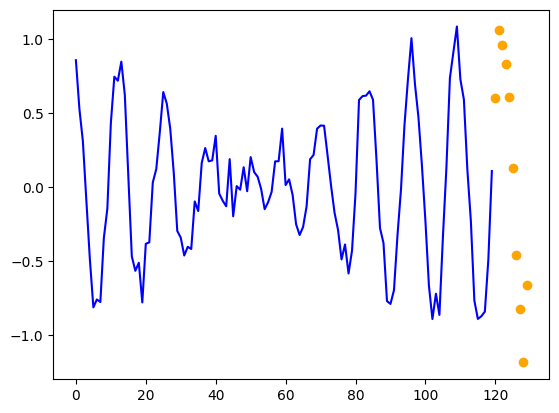

In [ ]:
seq_length = 120  # Sequence length used for training
look_ahead =  10

def gen_data(size=1000, noise=0.1): # We create 1000 data-points
    s = seq_length + look_ahead
    d = np.zeros((size, s,1))
    for i in range(size):
        start = np.random.uniform(0, 2*np.pi) # Random start point
        d[i,:,0] = np.sin(start + np.linspace(0, 20*np.pi, s)) * np.sin(start + np.linspace(0, np.pi, s)) + np.random.normal(0,noise,s)
        return d[:,0:seq_length], d[:,seq_length:s]
X,Y = gen_data()
for i in range(1):
    plt.plot(range(0, seq_length),X[i,:,0],'b-')
    plt.plot(range(seq_length, seq_length + look_ahead),Y[i,:,0],'bo',color='orange')

def slice(x, slice_length):
    return x[:,-slice_length:,:]

model1 = Sequential()
ks = 5
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', batch_input_shape=(None, None, 1)))
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal'))
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal'))
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal'))
model1.add(Dense(1))
model1.add(Lambda(slice, arguments={'slice_length':look_ahead}))

model1.summary()
model1.compile(optimizer='adam', loss='mean_squared_error')


history1 = model1.fit(X[60:90], Y[60:90],
                    epochs=150,
                    batch_size=120,
                    validation_data=(X[60:90],Y[60:90]),
                    verbose=0)

In [ ]:
import tensorflow as tf
# load required libraries:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation, Lambda, Convolution1D
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential()
model.add(Convolution1D(filters=1,
                 kernel_size=2,
                 padding='causal',
                 dilation_rate=1,
                 use_bias=False,
                 batch_input_shape=(None,3, 1)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 1)              2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.set_weights([np.asarray([[[1]],[[2]]])])
print(model.get_weights())

[array([[[1.]],

       [[2.]]], dtype=float32)]


In [ ]:
x_in=np.array([10,20,30])
x_in=x_in.reshape(1,3,1)
print("input")
print(x_in)
print("output")
print(model.predict(x_in))

input
[[[10]
  [20]
  [30]]]
output
1/1 [==============================] - 0s 155ms/step
[[[20.]
  [50.]
  [80.]]]


<ipython-input-5-2eacc583c0f6>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(range(seq_length, seq_length + look_ahead),Y[i,:,0],'bo',color='orange')


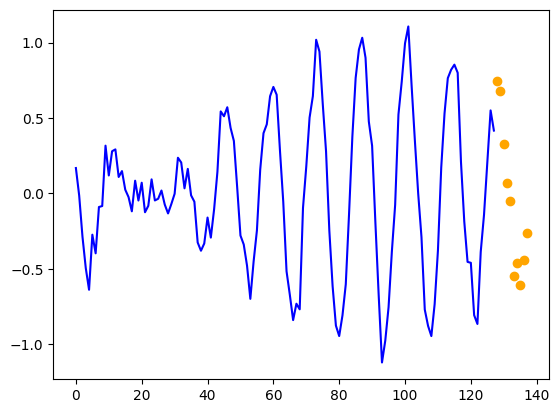

The training data X (solid) line and the next predictions Y (dotted), which should be forecasted.


In [ ]:
np.random.seed(1) # Fixing the seed, so that data is always the same
seq_length = 128  # Sequence length used for training
look_ahead =  10  # The number of data points the model should predict


def gen_data(size=1000, noise=0.1): # We create 1000 data-points
  s = seq_length + look_ahead
  d = np.zeros((size, s,1))
  for i in range(size):
    start = np.random.uniform(0, 2*np.pi) # Random start point
    d[i,:,0] = np.sin(start + np.linspace(0, 20*np.pi, s)) * np.sin(start + np.linspace(0, np.pi, s)) + np.random.normal(0,noise,s)
  return d[:,0:seq_length], d[:,seq_length:s]


X,Y = gen_data()
for i in range(1):
  plt.plot(range(0, seq_length),X[i,:,0],'b-')
  plt.plot(range(seq_length, seq_length + look_ahead),Y[i,:,0],'bo',color='orange')

plt.show()
print('The training data X (solid) line and the next predictions Y (dotted), which should be forecasted.')

In [ ]:
def slice(x, slice_length):
    return x[:,-slice_length:,:]

model1 = Sequential()
ks = 5
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', batch_input_shape=(None, None, 1)))
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal'))
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal'))
model1.add(Convolution1D(filters=32, kernel_size=ks, padding='causal'))
model1.add(Dense(1))
model1.add(Lambda(slice, arguments={'slice_length':look_ahead}))

model1.summary()
model1.compile(optimizer='adam', loss='mean_squared_error')


history1 = model1.fit(X[0:800], Y[0:800],
                    epochs=100,
                    batch_size=128,
                    validation_data=(X[800:1000],Y[800:1000]),
                    verbose=0)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, None, 32)          192       
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          5152      
                                                                 
 conv1d_3 (Conv1D)           (None, None, 32)          5152      
                                                                 
 conv1d_4 (Conv1D)           (None, None, 32)          5152      
                                                                 
 dense (Dense)               (None, None, 1)           33        
                                                                 
 lambda (Lambda)             (None, None, 1)           0         
                                                                 
Total params: 15681 (61.25 KB)
Trainable params: 15681

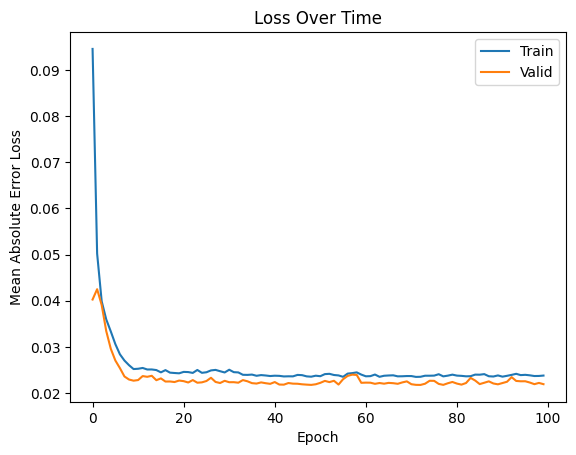

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time')
plt.legend(['Train','Valid'])

In [ ]:
X,Y = gen_data(noise=0)
res = model1.predict(X)
print('Shapes X {} Y{} res{}'.format(X.shape, Y.shape, res.shape))
print('MSE for complete look-ahead ', np.average((res[:,:,0] - Y[:,:,0])**2))
print('MSE for one step look-ahead ', np.average((res[:,0,0] - Y[:,0,0])**2))
print('MSE baseline (same as last)', np.average((X[:,-1,0] - Y[:,0,0])**2))

32/32 [==============================] - 0s 9ms/step
Shapes X (1000, 128, 1) Y(1000, 10, 1) res(1000, 10, 1)
MSE for complete look-ahead  0.0064098115542410685
MSE for one step look-ahead  0.008842094778153394
MSE baseline (same as last) 0.06147579415035294


In [ ]:
x_test,y_test = gen_data(size=1,noise=0.0)
model1.predict(x_test).reshape(-1),y_test.reshape(-1)

1/1 [==============================] - 0s 40ms/step


(array([ 0.88748175,  0.8964813 ,  0.7292092 ,  0.4227522 ,  0.04257188,
        -0.33159217, -0.6226019 , -0.77197564, -0.7517523 , -0.5697247 ],
       dtype=float32),
 array([ 0.85230934,  0.88453287,  0.73468149,  0.43794298,  0.05913728,
        -0.32152731, -0.6255856 , -0.7926458 , -0.7924877 , -0.63048301]))

In [ ]:
def predict_sequence(input_sequence, model, pred_steps):

    history_sequence = input_sequence.copy()
    pred_sequence = np.zeros((1,pred_steps * look_ahead,1)) # initialize output (pred_steps time steps)

    for i in range(pred_steps):

        # record next time step prediction (last time step of model output)
        last_step_pred = model.predict(history_sequence)[0,-look_ahead:,0]
        pred_sequence[0,(i * look_ahead) : ((i+1) * look_ahead),0] = last_step_pred

        # add the next time step prediction to the history sequence
        history_sequence = np.concatenate([history_sequence,
                                           last_step_pred.reshape(-1,look_ahead,1)], axis=1)

    return pred_sequence

1/1 [==============================] - 0s 24ms/step


(-1.0, 1.0)

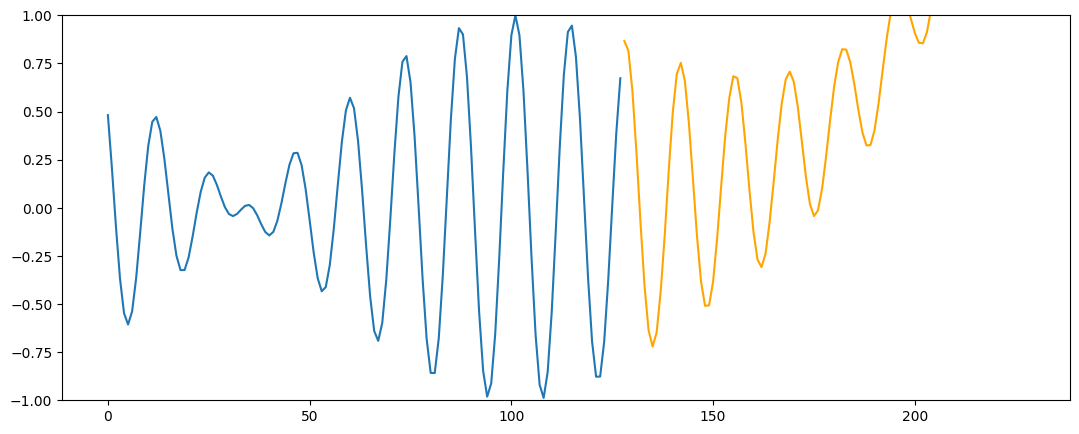

In [ ]:
plt.figure(num=None, figsize=(13,5))
pred_steps = 10
x_test,y_test = gen_data(size=1,noise=0.0)
preds = predict_sequence(x_test, model1, pred_steps)
plt.plot(range(0,len(x_test[0])),x_test[0,:,0])
plt.plot(range(len(x_test[0]),len(x_test[0])+len(preds[0])),preds[0,:,0],color='orange')
plt.ylim((-1,1))

In [ ]:
X,Y = gen_data(noise=0)

modeldil = Sequential()

modeldil.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=1,
                           batch_input_shape=(None, None, 1)))
modeldil.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=2))
modeldil.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=4))
modeldil.add(Convolution1D(filters=32, kernel_size=ks, padding='causal', dilation_rate=8))

modeldil.add(Dense(1))
modeldil.add(Lambda(slice, arguments={'slice_length':look_ahead}))

modeldil.summary()

modeldil.compile(optimizer='adam',loss='mean_squared_error')

histdil = modeldil.fit(X[0:800], Y[0:800],
                    epochs=200,
                    batch_size=128,
                    validation_data=(X[800:1000],Y[800:1000]), verbose=0)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, None, 32)          192       
                                                                 
 conv1d_6 (Conv1D)           (None, None, 32)          5152      
                                                                 
 conv1d_7 (Conv1D)           (None, None, 32)          5152      
                                                                 
 conv1d_8 (Conv1D)           (None, None, 32)          5152      
                                                                 
 dense_1 (Dense)             (None, None, 1)           33        
                                                                 
 lambda_1 (Lambda)           (None, None, 1)           0         
                                                                 
Total params: 15681 (61.25 KB)
Trainable params: 15681

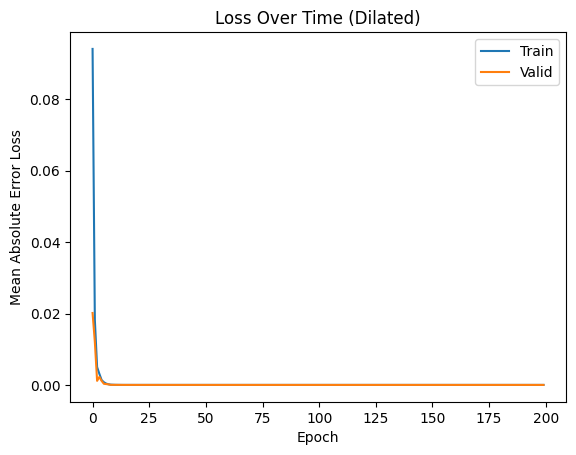

In [ ]:
plt.plot(histdil.history['loss'])
plt.plot(histdil.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error Loss')
plt.title('Loss Over Time (Dilated)')
plt.legend(['Train','Valid'])

In [ ]:
# Testing
X,Y = gen_data()
res = modeldil.predict(X)
print('MSE for one step look-ahead ', np.average((res[:,0,0] - Y[:,0,0])**2)) #One step look-ahead prediction
print('MSE baseline (same as last)', np.average((X[:,-1,0] - Y[:,0,0])**2))

32/32 [==============================] - 1s 14ms/step
MSE for one step look-ahead  0.014733585986313627
MSE baseline (same as last) 0.08270541455379668


1/1 [==============================] - 0s 34ms/step


(-1.0, 1.0)

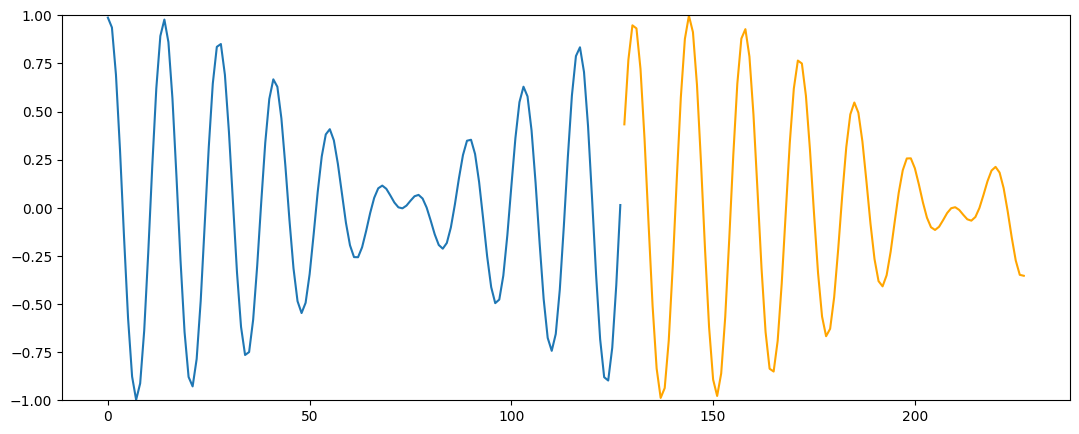

In [ ]:
plt.figure(num=None, figsize=(13,5))
pred_steps = 10
x_test,y_test = gen_data(size=1,noise=0.0)
preds = predict_sequence(x_test, modeldil, pred_steps)
plt.plot(range(0,len(x_test[0])),x_test[0,:,0])
plt.plot(range(len(x_test[0]),len(x_test[0])+len(preds[0])),preds[0,:,0],color='orange')
plt.ylim((-1,1))